In [30]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import Dense, Lambda, ELU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import plot_model

In [31]:
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#plot_model(model, to_file='model.png')

AttributeError: 'Dense' object has no attribute '_inbound_nodes'

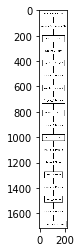

In [29]:
import matplotlib.pyplot as plt
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [26]:
row, col, ch = 120, 160, 3
    
drop = 0.2
    
img_in = Input(shape=(row, col, ch), name='img_in')
x = img_in
x = Cropping2D(cropping=((10,0), (0,0)))(x) #trim 10 pixels off top
x = Lambda(lambda x: x/127.5 - 1.)(x) # normalize and re-center
x = Conv2D(24, (5,5), strides=(2,2), activation='relu', name="conv2d_1")(x)
x = Dropout(drop)(x)
x = Conv2D(32, (5,5), strides=(2,2), activation='relu', name="conv2d_2")(x)
x = Dropout(drop)(x)
x = Conv2D(64, (5,5), strides=(2,2), activation='relu', name="conv2d_3")(x) 
x = Dropout(drop)(x)
x = Conv2D(64, (3,3), strides=(1,1), activation='relu', name="conv2d_4")(x)
x = MaxPool2D(pool_size=2, name='pool_1')(x) #Dropout(drop)(x)
x = Conv2D(64, (3,3), strides=(1,1), activation='relu', name="conv2d_5")(x)
x = Dropout(drop)(x)
    
x = Flatten(name='flattened')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(drop)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(drop)(x)

outputs = []
outputs.append(Dense(2, activation='linear', name='steering_throttle')(x))
    
        
model = Model(inputs=[img_in], outputs=outputs) 
model.compile(optimizer="sgd", loss="mse", metrics=['acc'])

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 120, 160, 3)       0         
_________________________________________________________________
cropping2d_9 (Cropping2D)    (None, 110, 160, 3)       0         
_________________________________________________________________
lambda_9 (Lambda)            (None, 110, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 78, 24)        1824      
_________________________________________________________________
dropout_46 (Dropout)         (None, 53, 78, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 37, 32)        19232     
_________________________________________________________________
dropout_47 (Dropout)         (None, 25, 37, 32)        0         
__________

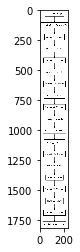

In [28]:
plot_model(model, to_file='20190328_run_05_PID.png')
data = plt.imread('20190328_run_05_PID.png')
plt.imshow(data)
plt.show()